<a href="https://colab.research.google.com/github/PCBZ/CS6140/blob/main/HW2B/HW2B_Problem6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading wine dataset...
Training time: 3.87 seconds
Train Accuracy: 100.00%
Test Accuracy: 100.00%


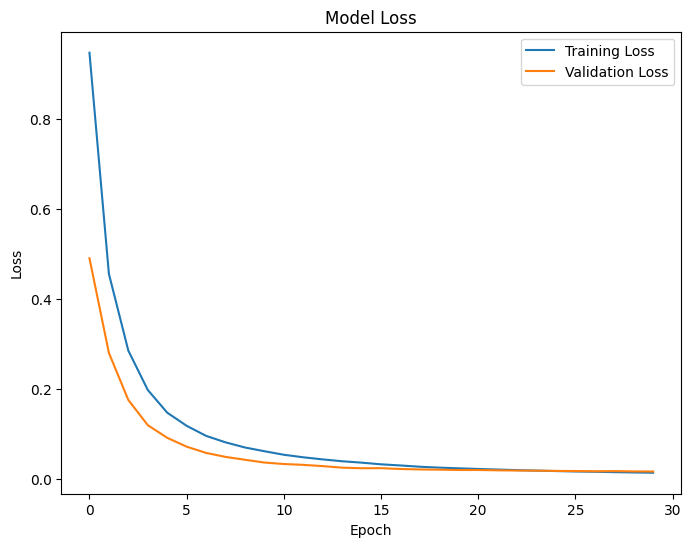

In [30]:
from math import e
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import time

def create_model(input_size, hidden_size, output_size, learning_rate = 0.1):
    """
    Creates a simple neural network model.
    """
    model = keras.Sequential([
        layers.Input(shape=(input_size,)),
        layers.Dense(hidden_size, activation='relu'),
        layers.Dense(output_size, activation='softmax')
    ])

    # Compile with cross-entropy loss and learning rate
    optimizer = keras.optimizers.SGD(learning_rate = learning_rate)
    model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])

    return model

def load_wine_data():
    train_url = "https://www.khoury.northeastern.edu/home/vip/teach/MLcourse/data/train_wine.csv"
    test_url = "https://www.khoury.northeastern.edu/home/vip/teach/MLcourse/data/test_wine.csv"

    # Load data
    train_data = pd.read_csv(train_url, header=None)
    test_data = pd.read_csv(test_url, header=None)

    # Separate features and labels
    X_train = train_data.iloc[:, 1:].values  # Features are columns 1-13
    y_train = train_data.iloc[:, 0].values   # Labels are column 0

    X_test = test_data.iloc[:, 1:].values
    y_test = test_data.iloc[:, 0].values

    unique_labels = np.unique(y_train)

    if unique_labels.min() > 0:
        y_train = y_train - 1
        y_test = y_test - 1

    return X_train, y_train, X_test, y_test

def main():
    # Load wine dataset
    print("Loading wine dataset...")
    X_train, y_train, X_test, y_test = load_wine_data()

    # Normalization
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Coding to one-hot
    num_classes = len(np.unique(y_train))
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    # Set hyperparameters
    input_size = X_train.shape[1]
    hidden_size = 10
    output_size = num_classes
    learning_rate = 0.2
    epochs = 30

    # Create a model
    model = create_model(input_size, hidden_size, output_size, learning_rate)

    start_time = time.time()
    # Train the model
    history = model.fit(X_train, y_train, epochs = epochs, validation_data = (X_test, y_test), verbose = 0)
    end_time = time.time()
    print(f"Training time: {end_time - start_time:.2f} seconds")

    # Evaluate the model
    train_loss, train_acc = model.evaluate(X_train, y_train, verbose = 0)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose = 0)

    print(f"Train Accuracy: {train_acc * 100:.2f}%")
    print(f"Test Accuracy: {test_acc * 100:.2f}%")

    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


